# What Demographic Features Predict Violent Crime?

Sources:

California Violent Crime Rate 2000-2013 (by county) - https://data.ca.gov/dataset/violent-crime-rate

US Census Age & Sex Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-agesex-5yr.csv

US Census Racial Data 2000 - 2010 - https://www2.census.gov/programs-surveys/popest/datasets/2000-2010/intercensal/county/co-est00int-sexracehisp.csv

Data Dictionary for US Census Data - https://www2.census.gov/programs-surveys/popest/technical-documentation/file-layouts/2000-2010/intercensal/county/

In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [104]:
#Set figure size for plots
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(rc={'figure.figsize':(13,10)})

## Import Violent Crime Data

In [4]:
#specify columns to import
violent_crime_cols = [
    'ind_definition',
    'reportyear', 
    'geotype', 
    'geoname', 
    'strata_level_name', 
    'numerator', 
    'denominator', 
    'rate', 
    'dof_population']

#read in data from Excel
violent_crime = pd.read_excel("hci_crime_752_pl_co_re_ca_2000-2013_21oct15-ada.xlsx",sheet_name='ViolentCrime'
                              , usecols=violent_crime_cols)

In [5]:
#preview of data
violent_crime.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
0,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Aggravated assault,138325.0,33847694.0,NaN,33873086.0
1,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Forcible rape,9784.0,33847694.0,NaN,33873086.0
2,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Murder and non-negligent manslaughter,2079.0,33847694.0,NaN,33873086.0
3,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Robbery,60237.0,33847694.0,NaN,33873086.0
4,"Number of Violent Crimes per 1,000 Population",2000.0,CA,California,Violent crime total,210448.0,33847694.0,6.217499,33873086.0


In [6]:
#Filter data
vc_filtered = violent_crime[(violent_crime.reportyear==2010.0) & (violent_crime.geotype == 'CO')]

In [7]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,NaN,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,NaN,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,NaN,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,NaN,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


In [8]:
#calculate the rate for each  type of crime
vc_filtered['rate'] = (vc_filtered['numerator'] / vc_filtered['denominator']) * 1000

#rename the rate column
vc_filtered.rename({'rate': 'rate_per_1000'}, axis=1, inplace=True)  # new method

In [9]:
vc_filtered.head()

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33915,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Aggravated assault,4942.0,1510271.0,3.272260,1510271.0
33916,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Forcible rape,524.0,1510271.0,0.346958,1510271.0
33917,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Murder and non-negligent manslaughter,132.0,1510271.0,0.087402,1510271.0
33918,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Robbery,4870.0,1510271.0,3.224587,1510271.0
33919,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alameda,Violent crime total,10468.0,1510271.0,6.931206,1510271.0


<AxesSubplot:xlabel='rate_per_1000', ylabel='Count'>

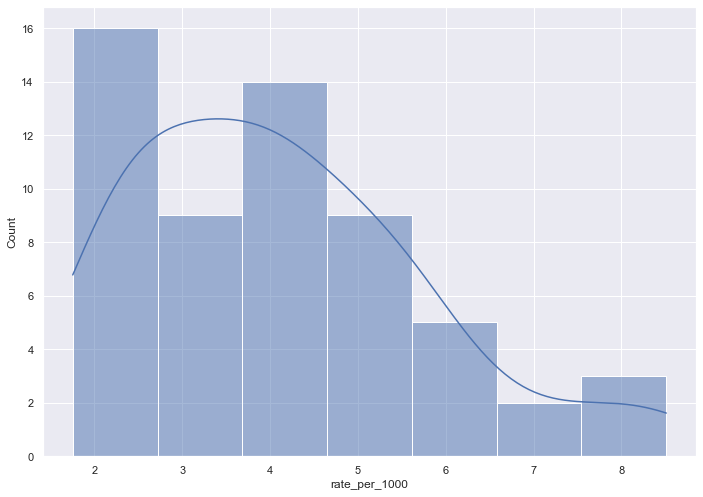

In [10]:
#Distribution of violent crimes by county
sns.histplot(vc_filtered[(vc_filtered.strata_level_name=='Violent crime total')]['rate_per_1000'], kde=True)

## What county has the highest violent crime rate?

In [11]:
vc_filtered[vc_filtered.rate_per_1000 == vc_filtered.rate_per_1000.max()]

,ind_definition,reportyear,geotype,geoname,strata_level_name,numerator,denominator,rate_per_1000,dof_population
33924,"Number of Violent Crimes per 1,000 Population",2010.0,CO,Alpine,Violent crime total,10.0,1175.0,8.510638,1175.0


## What forms of violent crime were commited the most?

In [12]:
vc_categorical = vc_filtered[(vc_filtered.strata_level_name!='Violent crime total')]
vc_categorical = vc_categorical[['numerator','strata_level_name']]
vc_categorical = vc_categorical.groupby(['strata_level_name']).sum().reset_index()
vc_categorical.head()

,strata_level_name,numerator
0,Aggravated assault,95706.0
1,Forcible rape,8324.0
2,Murder and non-negligent manslaughter,1809.0
3,Robbery,58091.0


<AxesSubplot:xlabel='strata_level_name', ylabel='numerator'>

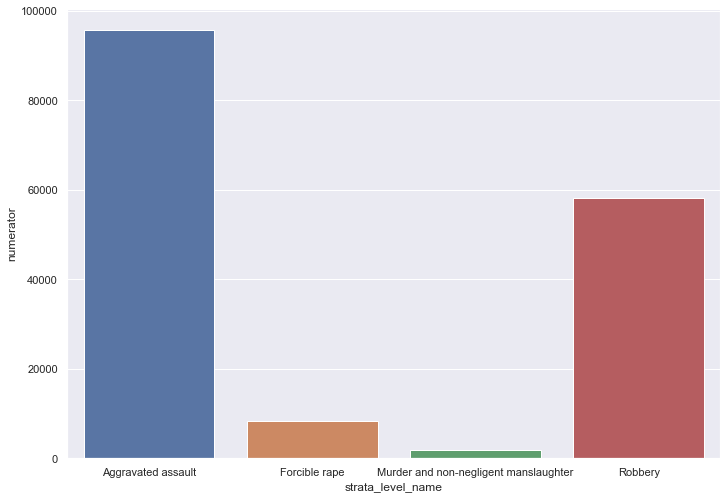

In [13]:
sns.barplot(x='strata_level_name', y='numerator', data=vc_categorical)

## Import Census Demographic Data - Age & Sex

In [14]:
age_sex_columns = [
    'STNAME',
    'CTYNAME',
    'AGEGRP',
    'SEX',
    'CENSUS2010POP'
]
age_sex = pd.read_csv('co-est00int-agesex-5yr.csv', usecols=age_sex_columns, encoding = "ISO-8859-1")

In [15]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
0,Alabama,Autauga County,0,0,54571.0
1,Alabama,Autauga County,0,1,3579.0
2,Alabama,Autauga County,0,2,3991.0
3,Alabama,Autauga County,0,3,4290.0
4,Alabama,Autauga County,0,4,4290.0


In [16]:
#Filter out all other states besides California
age_sex = age_sex[(age_sex.STNAME=='California')]

In [17]:
age_sex.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP
10602,California,Alameda County,0,0,1510271.0
10603,California,Alameda County,0,1,97652.0
10604,California,Alameda County,0,2,94546.0
10605,California,Alameda County,0,3,91070.0
10606,California,Alameda County,0,4,100394.0


In [18]:
#Clean up County Name
age_sex['NEW_CTY_NAME'] = age_sex['CTYNAME'].str.replace(' County', '')

In [19]:
#Filter out sex segregated rows, keep only age segregated data
age_only = age_sex[(age_sex.SEX==0) & (age_sex.AGEGRP > 0)]

In [20]:
age_only['TOTAL_POP'] = 0
for index,row in age_only.iterrows():
    #find total pop
    total_pop = age_sex[(age_sex.CTYNAME == row['CTYNAME']) & (age_sex.SEX == 0) & (age_sex.AGEGRP==0)]['CENSUS2010POP'].max()
    age_only.at[index, 'TOTAL_POP'] = total_pop
age_only['POP_PROPORTION'] = (age_only['CENSUS2010POP'] / age_only['TOTAL_POP'] * 100)

In [21]:
age_only.head()

,STNAME,CTYNAME,SEX,AGEGRP,CENSUS2010POP,NEW_CTY_NAME,TOTAL_POP,POP_PROPORTION
10603,California,Alameda County,0,1,97652.0,Alameda,1510271,6.465859
10604,California,Alameda County,0,2,94546.0,Alameda,1510271,6.260201
10605,California,Alameda County,0,3,91070.0,Alameda,1510271,6.030044
10606,California,Alameda County,0,4,100394.0,Alameda,1510271,6.647416
10607,California,Alameda County,0,5,107049.0,Alameda,1510271,7.088066


## What counties have the oldest populations?

Let's create a new dataframe with a column called **ABOVE_50** which is the percentage of the population above 35 years old

#### The key for AGEGRP is as follows:
0 = Total  
1 = Age 0 to 4 years  
2 = Age 5 to 9 years  
3 = Age 10 to 14 years  
4 = Age 15 to 19 years  
5 = Age 20 to 24 years  
6 = Age 25 to 29 years  
7 = Age 30 to 34 years  
8 = Age 35 to 39 years   
9 = Age 40 to 44 years  
10 = Age 45 to 49 years  
11 = Age 50 to 54 years  
12 = Age 55 to 59 years  
13 = Age 60 to 64 years  
14 = Age 65 to 69 years  
15 = Age 70 to 74 years  
16 = Age 75 to 79 years  
17 = Age 80 to 84 years  
18 = Age 85 years and older  

In [22]:
older_population = age_only[['NEW_CTY_NAME', 'TOTAL_POP']]
older_population.rename({'NEW_CTY_NAME': 'CTYNAME'}, axis=1, inplace=True)
older_population.drop_duplicates(subset=['CTYNAME'], inplace=True)
older_population['ABOVE_50'] = 0

In [23]:
for index, row in older_population.iterrows():
    county = row['CTYNAME']
    older_proportions = age_only[(age_only.NEW_CTY_NAME == county) & (age_only.AGEGRP >= 11)]['POP_PROPORTION']
    sum_proportions = older_proportions.sum()
    older_population.at[index, 'ABOVE_50'] = sum_proportions

In [24]:
older_population.head()

,CTYNAME,TOTAL_POP,ABOVE_50
10603,Alameda,1510271,29
10660,Alpine,1175,43
10717,Amador,38091,47
10774,Butte,220000,35
10831,Calaveras,45578,48


In [25]:
older_population['ABOVE_50'].describe()

count    58.000000
mean     33.775862
std       7.874104
min      22.000000
25%      27.250000
50%      31.500000
75%      39.000000
max      51.000000
Name: ABOVE_50, dtype: float64

<AxesSubplot:xlabel='ABOVE_50', ylabel='Count'>

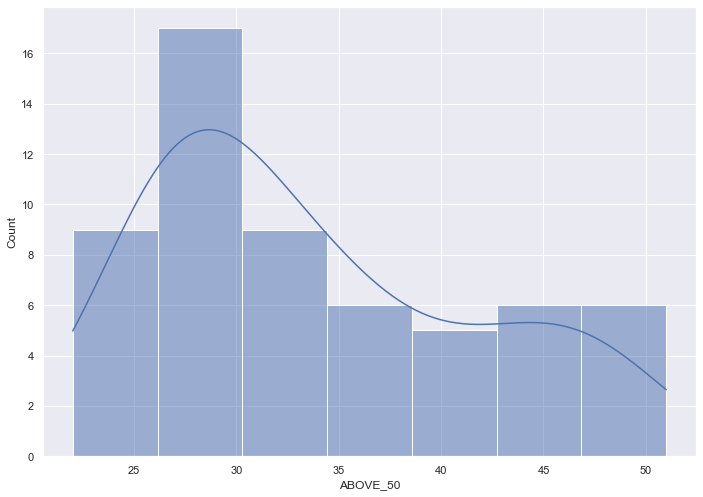

In [26]:
sns.histplot(older_population['ABOVE_50'], kde=True)

In [27]:
older_population.nlargest(5, 'ABOVE_50')

,CTYNAME,TOTAL_POP,ABOVE_50
13168,Sierra,3240,51
12370,Plumas,20007,49
10831,Calaveras,45578,48
11800,Mariposa,18251,48
13567,Trinity,13786,48


## Do older populations have less violent crime?

In [28]:
#Let's join the older_population and violent crime dataframes
vc_total = vc_filtered[(vc_filtered.strata_level_name=='Violent crime total')]
vc_total.rename({'geoname': 'CTYNAME'}, axis=1, inplace=True)
age_vc = older_population.merge(vc_total, how='inner', on='CTYNAME')[['CTYNAME','rate_per_1000', 'ABOVE_50']]

In [29]:
age_vc.corr(method='pearson')

,rate_per_1000,ABOVE_50
rate_per_1000,1.000000,-0.163612
ABOVE_50,-0.163612,1.000000


[Text(0.5, 0, 'County Population Above 50 (%)'),
 Text(0, 0.5, 'Violent Crimes per 1000')]

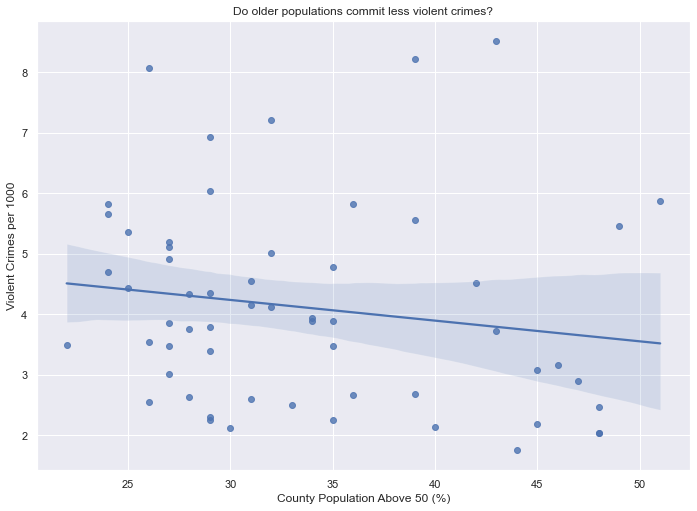

In [92]:
fig = sns.regplot(x='ABOVE_50', y='rate_per_1000', data=age_vc)
fig.set(title='Do older populations commit less violent crimes?')
fig.set(xlabel='County Population Above 50 (%)', ylabel='Violent Crimes per 1000')

## Do any form of violent crimes occur more or less frequently in older populations?

In [67]:
#Pivot table to get violent crime rate categorically data by each county
pivot_vc = vc_filtered[['strata_level_name','geoname','rate_per_1000']]
pivot_vc.rename({'geoname': 'CTYNAME'}, axis=1, inplace=True)
pivot_vc = pd.pivot_table(pivot_vc, index='CTYNAME', columns=['strata_level_name']).reset_index().dropna()
pivot_vc.head()

CTYNAME      rate_per_1000                \
strata_level_name               Aggravated assault Forcible rape   
0                       Alameda           3.272260      0.346958   
2                        Amador           2.284004      0.315035   
3                         Butte           2.300000      0.418182   
4                     Calaveras           1.470007      0.241345   
6                  Contra Costa           2.388885      0.180167   

                                                                   \
strata_level_name Murder and non-negligent manslaughter   Robbery   
0                                              0.087402  3.224587   
2                                              0.026253  0.262529   
3                                              0.031818  0.713636   
4                                              0.021940  0.307166   
6                                              0.061962  1.492815   

                                       
strata_level_name Violent crime total  
0                            6.931206  
2                            2.887821  
3                            3.463636  
4                            2.040458  
6                            4.123829

In [86]:
merge_vc_df = pivot_vc['rate_per_1000']
merge_vc_df['CTYNAME'] = pivot_vc['CTYNAME']

In [87]:
age_vc_categorical = older_population.merge(merge_vc_df, how='inner', on='CTYNAME')

In [121]:
age_vc_categorical.head()

,CTYNAME,TOTAL_POP,ABOVE_50,Aggravated assault,Forcible rape,Murder and non-negligent manslaughter,Robbery,Violent crime total
0,Alameda,1510271,29,3.272260,0.346958,0.087402,3.224587,6.931206
1,Amador,38091,47,2.284004,0.315035,0.026253,0.262529,2.887821
2,Butte,220000,35,2.300000,0.418182,0.031818,0.713636,3.463636
3,Calaveras,45578,48,1.470007,0.241345,0.021940,0.307166,2.040458
4,Contra Costa,1049025,32,2.388885,0.180167,0.061962,1.492815,4.123829


In [120]:
age_vc_categorical[['ABOVE_50','Forcible rape','Robbery','Aggravated assault','Murder and non-negligent manslaughter']].corr()

,ABOVE_50,Forcible rape,Robbery,Aggravated assault,Murder and non-negligent manslaughter
ABOVE_50,1.000000,0.273936,-0.409066,-0.129614,-0.403713
Forcible rape,0.273936,1.000000,-0.155783,0.291590,0.209254
Robbery,-0.409066,-0.155783,1.000000,0.240911,0.576893
Aggravated assault,-0.129614,0.291590,0.240911,1.000000,0.332134
Murder and non-negligent manslaughter,-0.403713,0.209254,0.576893,0.332134,1.000000


<AxesSubplot:xlabel='ABOVE_50', ylabel='Murder and non-negligent manslaughter'>

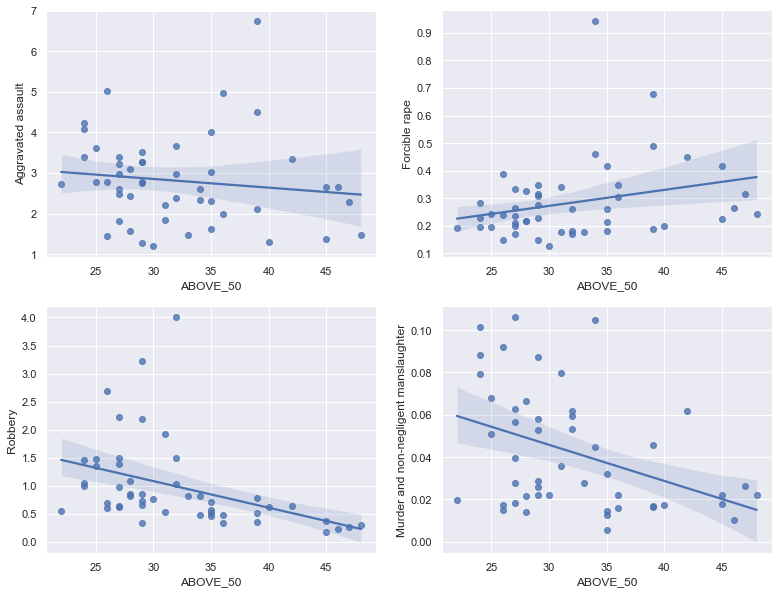

In [113]:
fig, axs = plt.subplots(ncols=2,nrows=2)
sns.regplot(x='ABOVE_50', y='Aggravated assault', data=age_vc_categorical, ax=axs[0][0])
sns.regplot(x='ABOVE_50', y='Forcible rape', data=age_vc_categorical, ax=axs[0][1])
sns.regplot(x='ABOVE_50', y='Robbery', data=age_vc_categorical, ax=axs[1][0])
sns.regplot(x='ABOVE_50', y='Murder and non-negligent manslaughter', data=age_vc_categorical, ax=axs[1][1])